In [1]:
!git clone https://github.com/AxeldeRomblay/mlbox.git


fatal: destination path 'mlbox' already exists and is not an empty directory.


In [2]:
%cd mlbox


/content/mlbox


In [3]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *


In [4]:
target_name='SalePrice'
rd=Reader(sep=",")
df1=rd.train_test_split(['/content/train.csv','/content/test.csv'],target_name)


reading csv : train.csv ...
cleaning data ...


/content/mlbox/mlbox/preprocessing/reader.py:232: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(path,


CPU time: 17.0041983127594 seconds

reading csv : test.csv ...
cleaning data ...


/content/mlbox/mlbox/preprocessing/reader.py:232: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(path,


CPU time: 0.36043238639831543 seconds

> Number of common features : 80

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 43
> Number of numerical features: 37
> Number of training samples : 1460
> Number of test samples : 1459

> Top sparse features (% missing values on train set):
PoolQC         99.5
MiscFeature    96.3
Alley          93.8
Fence          80.8
FireplaceQu    47.3
dtype: float64

> Task : regression
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [5]:
df1

{'train':       1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
 0        856.0     854.0        0.0   NaN           3.0     1Fam       TA   
 1       1262.0       0.0        0.0   NaN           3.0     1Fam       TA   
 2        920.0     866.0        0.0   NaN           3.0     1Fam       TA   
 3        961.0     756.0        0.0   NaN           3.0     1Fam       Gd   
 4       1145.0    1053.0        0.0   NaN           4.0     1Fam       TA   
 ...        ...       ...        ...   ...           ...      ...      ...   
 1455     953.0     694.0        0.0   NaN           3.0     1Fam       TA   
 1456    2073.0       0.0        0.0   NaN           3.0     1Fam       TA   
 1457    1188.0    1152.0        0.0   NaN           4.0     1Fam       Gd   
 1458    1078.0       0.0        0.0   NaN           2.0     1Fam       TA   
 1459    1256.0       0.0        0.0   NaN           3.0     1Fam       TA   
 
      BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... SaleT

In [6]:
pip install dataprep


In [7]:
from dataprep.eda import create_report


In [8]:
report = create_report(df1['train'])


Computing series-max-chunk-series-max-agg-3de7cd6d4aea231abb5dbce97ee42557:  31%|███       | 3318/10720 [00:02<00:04, 1520.27it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
Computing getitem-0fd62d38e0c0a94c723243ce27aa3d93:  40%|████      | 4310/10720 [00:03<00:02, 2139.09it/s] /usr/local/lib/python3.10/dist-packages/dataprep/eda/utils.py:392: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return cast(Tuple[float, float], ks_2samp_(data1, data2))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning:

The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



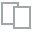
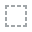
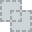
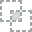
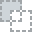
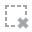
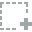
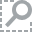
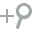
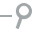
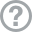
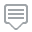
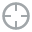
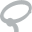
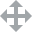
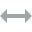
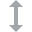
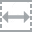
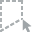
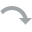
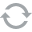
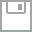
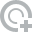
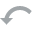
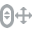
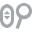
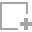
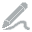
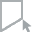
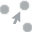
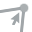
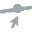

In [9]:
report.show()


In [12]:
dft = Drift_thresholder()
df1 = dft.fit_transform(df1)


computing drifts ...
CPU time: 2.7651495933532715 seconds

> Top 10 drifts

('Id', 1.0)
('BsmtFinSF1', 0.04583446529729285)
('MSSubClass', 0.04345102669581591)
('BedroomAbvGr', 0.04020319107011061)
('OverallCond', 0.0374701319822357)
('ScreenPorch', 0.0327681776422768)
('Condition1', 0.032472169388656935)
('LotShape', 0.032172707969257974)
('GarageCars', 0.03081173463727338)
('Fence', 0.02976188472063601)

> Deleted variables : ['Id']
> Drift coefficients dumped into directory : save


In [13]:
# Creation of the best predictor
opt = Optimiser(scoring="accuracy", n_folds=3)
opt.evaluate(None, df1)

No parameters set. Default configuration is tested

##################################################### testing hyper-parameters... #####################################################

>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

>>> CA ENCODER :{'strategy': 'label_encoding'}

>>> ESTIMATOR :{'strategy': 'LightGBM', 'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.8, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 0.9, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}



/content/mlbox/mlbox/optimisation/optimiser.py:73: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  warnings.warn("Optimiser will save all your fitted models into directory '"
/content/mlbox/mlbox/model/regression/regressor.py:155: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version.
  if((type(df_train) != pd.SparseDataFrame) and


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2959
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 71
[LightGBM] [Info] Start training from score 181248.821172


/content/mlbox/mlbox/model/regression/regressor.py:276: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version.
  if ((type(df) != pd.SparseDataFrame) & (type(df) != pd.DataFrame)):
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2973
[LightGBM] [Info] Number of data points in the train set: 973, number of used features: 71
[LightGBM] [Info] Start training from score 180470.152107


/content/mlbox/mlbox/model/regression/regressor.py:276: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version.
  if ((type(df) != pd.SparseDataFrame) & (type(df) != pd.DataFrame)):
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2941
[LightGBM] [Info] Number of data points in the train set: 974, number of used features: 70
[LightGBM] [Info] Start training from score 181044.487680

MEAN SCORE : accuracy = nan
VARIANCE : nan (fold 1 = nan, fold 2 = nan, fold 3 = nan)
CPU time: 2.624701499938965 seconds



/content/mlbox/mlbox/model/regression/regressor.py:276: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version.
  if ((type(df) != pd.SparseDataFrame) & (type(df) != pd.DataFrame)):
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr

nan


> No parameters set. Default configuration is tested

fitting the pipeline ...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3392
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 74
[LightGBM] [Info] Start training from score 180921.195890


/content/mlbox/mlbox/model/regression/regressor.py:155: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version.
  if((type(df_train) != pd.SparseDataFrame) and


CPU time: 0.8491404056549072 seconds


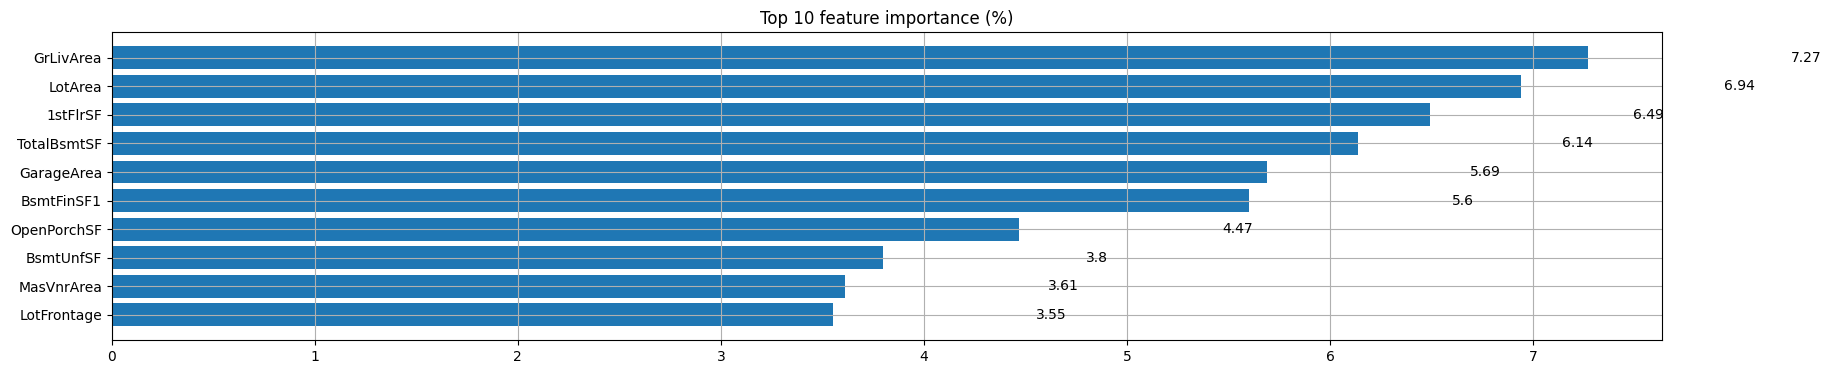


> Feature importances dumped into directory : save

predicting...
CPU time: 0.19072508811950684 seconds

> Overview on predictions : 

   SalePrice_predicted
0        127418.344771
1        158775.569673
2        185685.409842
3        189755.086795
4        187089.967484
5        171100.672412
6        171902.576861
7        172750.130327
8        172130.566204
9        124719.689489

dumping predictions into directory : save ...


/content/mlbox/mlbox/model/regression/regressor.py:276: FutureWarning: The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version.
  if ((type(df) != pd.SparseDataFrame) & (type(df) != pd.DataFrame)):


In [16]:
# Generate predictions
prd = Predictor()
prd.fit_predict(None, df1)
